<a href="https://colab.research.google.com/github/yejin0455/sesac-DL/blob/main/D16_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%run my_init.py

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
tf.__version__: 2.8.0
keras.__version__: 2.8.0


In [ ]:
%matplotlib inline

In [ ]:
model = keras.models.load_model(r'/content/drive/MyDrive/best-cnn-model.h5')

In [ ]:
model.layers

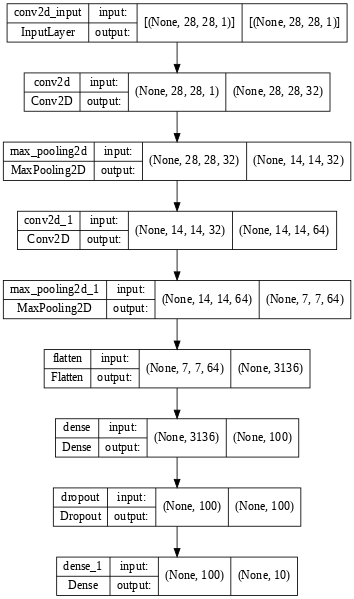

In [ ]:
keras.utils.plot_model(model, show_shapes=True, dpi=60)

In [ ]:
conv = model.layers[0]

In [ ]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
?keras.layers.Layer.weights

In [ ]:
np.mean(conv.weights[0]), np.std(conv.weights[0])

(-0.019786652, 0.27174228)

In [ ]:
np.min(conv.weights[0]), np.max(conv.weights[0])

(-1.7435269, 0.4942378)

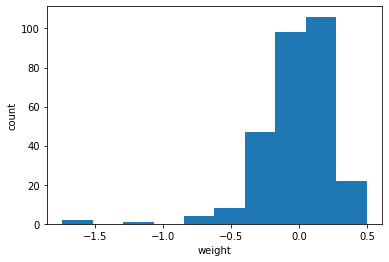

In [ ]:
plt.hist(conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

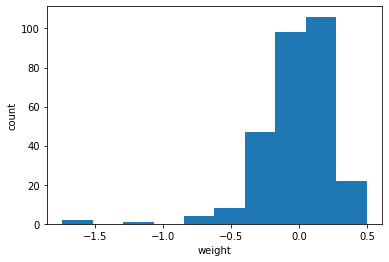

In [ ]:
plt.hist(conv.weights[0].numpy().ravel()) #flatten()
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
conv.weights[0].numpy()[:, :, 0, 0] # 첫 번째 필터의 커널 정보(=가중치) <= 학습된 결과 

array([[ 0.34763944,  0.23933959, -0.42653647],
       [-0.01938307,  0.07038993, -0.5092756 ],
       [-0.02680635,  0.4942378 , -0.11677799]], dtype=float32)

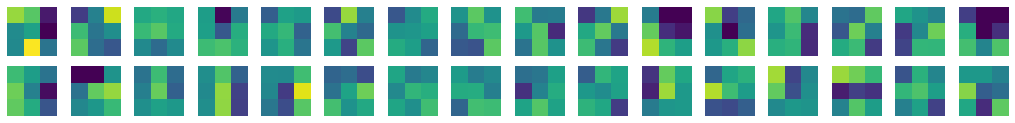

In [ ]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()

In [ ]:
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, padding='same', \
                                          input_shape=(28, 28, 1), activation='relu'))

In [ ]:
no_training_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [ ]:
no_training_model.layers

In [ ]:
no_training_conv = no_training_model.layers[0]
no_training_conv.weights[0].shape, no_training_conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

In [ ]:
np.mean(no_training_conv.weights[0]), np.std(no_training_conv.weights[0])

(0.0077280873, 0.07932974)

In [ ]:
np.min(no_training_conv.weights[0]), np.max(no_training_conv.weights[0])

(-0.14202087, 0.1405393)

In [ ]:
from scipy.stats import uniform

rv = uniform.rvs(0, 1, (3, 3, 1, 32), random_state=42)
rv.shape

(3, 3, 1, 32)

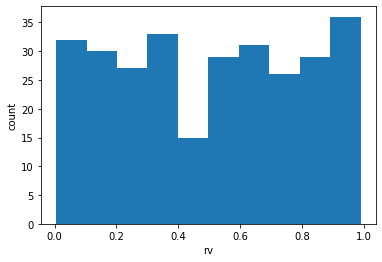

In [ ]:
plt.hist(rv.ravel())
plt.xlabel('rv')
plt.ylabel('count')
plt.show()

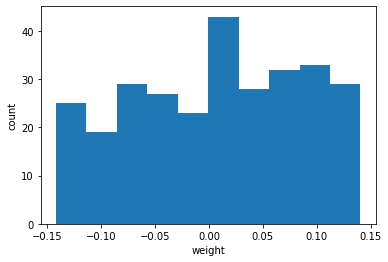

In [ ]:
plt.hist(no_training_conv.weights[0].numpy().reshape(-1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

In [ ]:
no_training_conv.weights[0].numpy()[:, :, 0, 0]

array([[ 0.0130984 ,  0.11575492, -0.09649855],
       [ 0.1363128 , -0.06049965,  0.01191375],
       [ 0.00939517,  0.07812819,  0.07244267]], dtype=float32)

In [ ]:
no_training_conv.weights[0].numpy().min(), no_training_conv.weights[0].numpy().max()

(-0.14202087, 0.1405393)

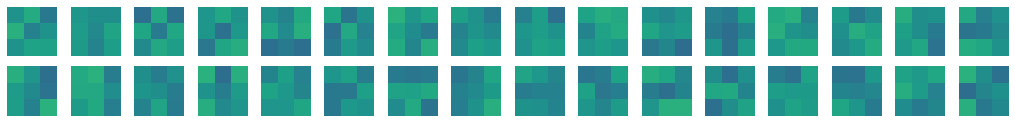

In [ ]:
fig, axes = plt.subplots(2, 16, figsize=(18, 2))
for i in range(2):
  for j in range(16):
    axes[i, j].imshow(no_training_conv.weights[0].numpy()[:, :, 0, i*16 + j], vmin=-0.5, vmax=0.5)
    axes[i, j].axis('off')
plt.show()

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', name='dense1')
dense2 = keras.layers.Dense(10, activation='softmax', name='dense2')

In [ ]:
inputs = keras.Input(shape=(784, ), name='input')
inputs

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'input')>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 100)               3

In [ ]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv2d_input')>

In [ ]:
model.layers[0].output

<KerasTensor: shape=(None, 28, 28, 32) dtype=float32 (created by layer 'conv2d')>

In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)
conv_acti

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
inputs = X_train[0:1].reshape(-1, 28, 28, 1) / 255.0

In [ ]:
feature_maps = conv_acti.predict(inputs)
feature_maps.shape

(1, 28, 28, 32)

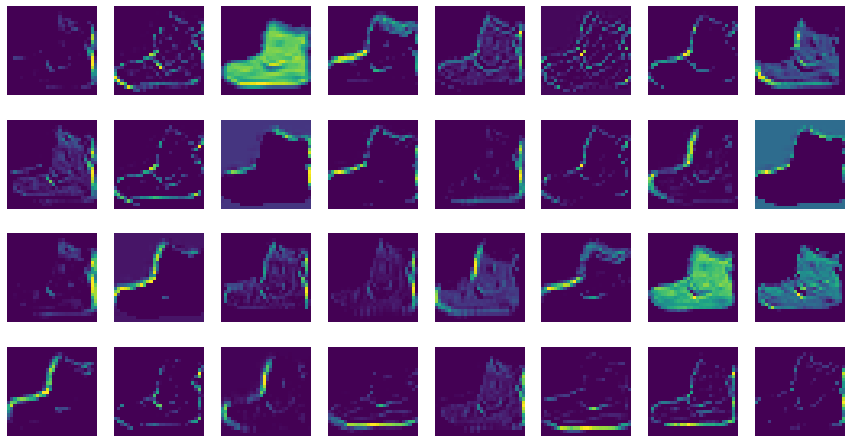

In [ ]:
fig, axes = plt.subplots(4, 8, figsize=(15, 8))

for i in range(4):
    for j in range(8):
        axes[i, j].imshow(feature_maps[0, :, :, i*8 + j])
        axes[i, j].axis('off')
plt.show()